# 6.6 使用多元逻辑回归实现鸢尾花分类

### 1.任务描述

要求：

- 从sklearn.datasets模块中获取鸢尾花数据集
- 对数据集进行部分取样，抽取出山鸢尾和变色鸢尾样本中的花萼长和花萼宽两个特征
- 通过预处理，将采样数据转换成可训练数据
- 搭建二元逻辑回归模型。
- 训练模型，绘制模型曲线

### 2.知识准备

见教程。

### 3.任务分析

为了分类结果的可视化结果更直观，只取用其中两种特征来进行模型训练。通过切片法取出其中两列特征数据后，对这两列特征数据进行中心化，使其以零点为中心分布，至此就完成了训练数据的预处理。

由于只涉及两种鸢尾花的分类，所以可以使用Sigmoid激活函数来进行模型训练。

### 4.任务实施


执行代码

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from sklearn import datasets
# 处理中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 1，从datasets中获取数据集
# 1.1，获取训练集
iris = datasets.load_iris().data
# 1.2，获取训练数据特征（花萼长和花萼宽）
train_x = iris[:,0:2]
# 1.3，从datasets中获取鸢尾花标签列
train_y = datasets.load_iris().target

# 1.4，获取山鸢尾和变色鸢尾的样本特征
x_train=train_x[train_y<2]

# 1.5，获取山鸢尾和变色鸢尾的样本标签
y_train=train_y[train_y<2]

# 2，数据预处理
# 2.1，数据归一化
# 由于花萼长和花萼宽的尺度相同，所以不用进行归一化

# 2.2，数据中心化
# 需要按列中心化，指定axis=0
x_train=x_train-np.mean(x_train,axis=0)

# 2.3，数据形状转换
x0_train=np.ones(len(x_train)).reshape(-1,1)
# 形状为78*3
X=tf.concat((x0_train,x_train),axis=1)
# print(X)
X=tf.cast(X,tf.float32)
# 形状为78*1
Y=y_train.reshape(-1,1)
Y=tf.cast(Y,tf.float32)
print(X.shape,Y.shape)



(100, 3) (100, 1)


In [19]:
# 3，设置超参数
# 学习率
lr=0.2
# 迭代次数
iter=120
# 显示频率
display_step=30

# 模型参数
np.random.seed(612)
# 形状为3*1
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)
print(W)

# 4，训练模型
# 存放训练集的交叉熵损失
ce=[]
# 存放训练集的分类准确率
acc=[]
for i in range(1,iter+1):
    with tf.GradientTape() as tape:
        # 线性输出
        lineout=tf.matmul(X,W)
        # 计算预测值
        PRED=1/(1+tf.exp(-lineout))
        # 计算损失
        Loss=-tf.reduce_mean(Y*tf.math.log(PRED)+(1-Y)*tf.math.log(1-PRED))
    #计算准确率
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy()<0.5,0.,1.),Y),tf.float32))
    # 添加到列表
    ce.append(Loss)
    # 添加到列表
    acc.append(accuracy)
    # 计算导数
    dL_dW=tape.gradient(Loss,W)
    # 更新参数
    W.assign_sub(lr*dL_dW)

    if i % display_step==0:
        print(i,Loss.numpy(),accuracy.numpy())

    
print(W.numpy())

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.01337706],
       [-1.1628988 ],
       [-0.22487308]], dtype=float32)>
30 0.4885017 0.98
60 0.31884614 0.99
90 0.24410412 1.0
120 0.20173997 1.0
[[ 0.04691981]
 [ 2.131389  ]
 [-2.2534163 ]]


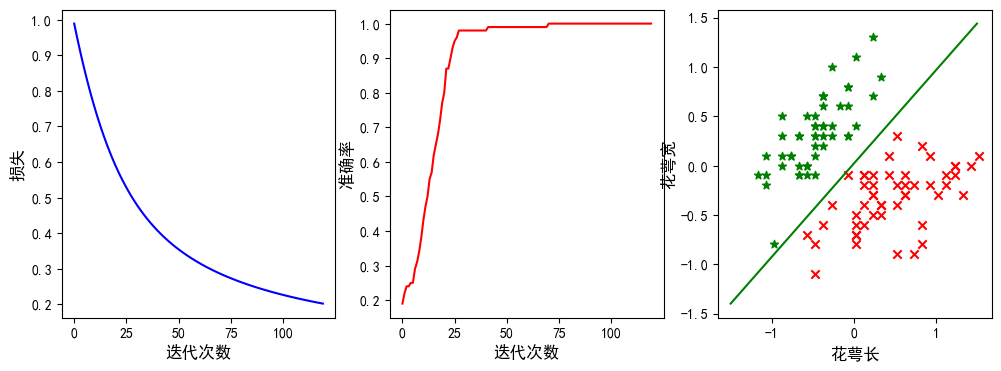

In [20]:
# 5，可视化结果
# 5.1，绘制损失和准确率
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.xlabel("迭代次数",fontsize='large')
plt.ylabel("损失",fontsize='large')
plt.plot(ce,color="blue",label="Loss")
plt.subplot(132)
plt.xlabel("迭代次数",fontsize='large')
plt.ylabel("准确率",fontsize='large')
plt.plot(acc,color="red",label="acc")

# 5.2，绘制散点图
plt.subplot(133)
plt.xlabel("花萼长",fontsize='large')
plt.ylabel("花萼宽",fontsize='large')
y_train = [int(i) for i in y_train]
for i in range(len(x_train[:,0])):
    if (y_train[i] == 0):
        plt.scatter(x_train[:,0][i],x_train[:,1][i],c='g',marker='*')
    else:
        plt.scatter(x_train[:,0][i],x_train[:,1][i],c='r',marker='x')

# 5.3，绘制决策边界
x_=[-1.5,1.5]
# 使用预测到的W值计算y轴数据
y_=-(W[1]*x_+W[0])/W[2]
# 可视化拟合直线
plt.plot(x_,y_,color="g")
plt.show()